In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import powerlaw
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def readReview(path, business):
    review=[]
    reviewdf = pd.DataFrame.from_records(review)
    with open(path + "review.json", 'rb') as f:
        for l in f:
            data = json.loads(l)
            review.append(data)
            if len(review) > 1000000:
                df = pd.DataFrame.from_records(review)
                df = pd.merge(df, business, on=['business_id'])
                review = []
                reviewdf = pd.concat([reviewdf, df])
        df = pd.DataFrame.from_records(review)
        df = pd.merge(df, business, on=['business_id'])
        review = []
        reviewdf = pd.concat([reviewdf, df])
    return reviewdf
def readBusiness(path):
    business=[]
    for l in open(path + "business.json", 'rb').readlines():
        business.append(json.loads(l))
    businessdf = pd.DataFrame.from_records(business)
    return businessdf

In [4]:
path = "/Users/xiaxun/Downloads/yelp_dataset/"
business = readBusiness(path)
business = business[business.state == "IL"]
business = business.drop(['stars'],axis=1)
review = readReview(path, business)

In [5]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
from textblob import TextBlob

In [6]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

In [7]:
# function for pre-processing the text of reviews: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [8]:
review['text_processed'] = review['text'].apply(preprocess)

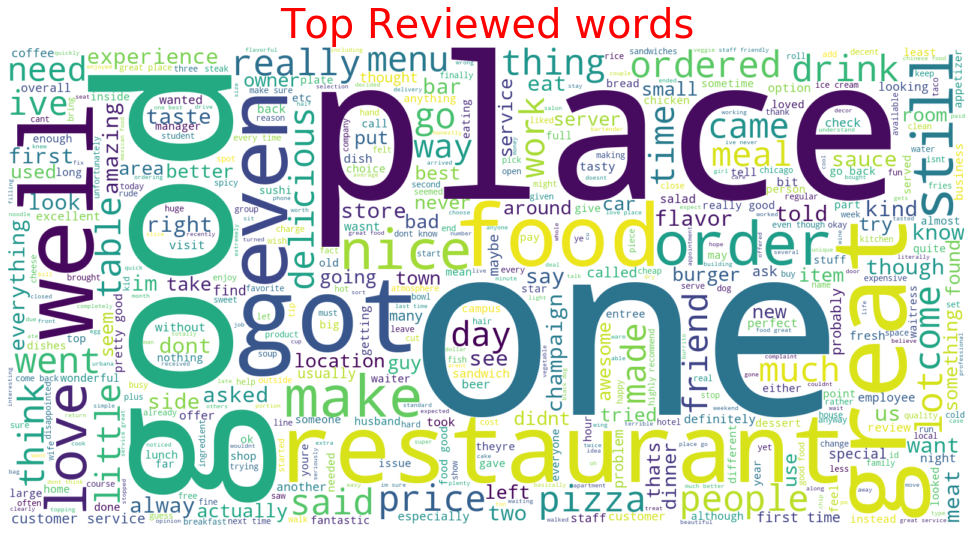

In [9]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

### Sentiment analysis

In [10]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [11]:
review['text_sentiment'] = review['text_processed'].apply(sentiment)

In [12]:
review['sentiment'] = ''
review['sentiment'][review['text_sentiment'] > 0] = 'positive'
review['sentiment'][review['text_sentiment'] < 0] = 'negative'
review['sentiment'][review['text_sentiment'] == 0] = 'neutral'

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

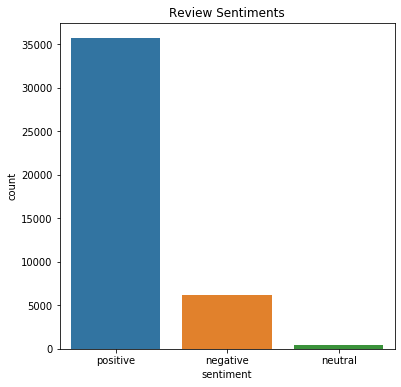

In [13]:
plt.figure(figsize=(6,6))
ax = sns.countplot(review['sentiment'])
plt.title('Review Sentiments');

In [14]:
review_posr = pd.DataFrame(review['text_processed'][ review['sentiment'] == 'positive'])
review_negr = pd.DataFrame(review['text_processed'][ review['sentiment'] == 'negative'])
review_neutr = pd.DataFrame(review['text_processed'][ review['sentiment'] == 'neutral'])

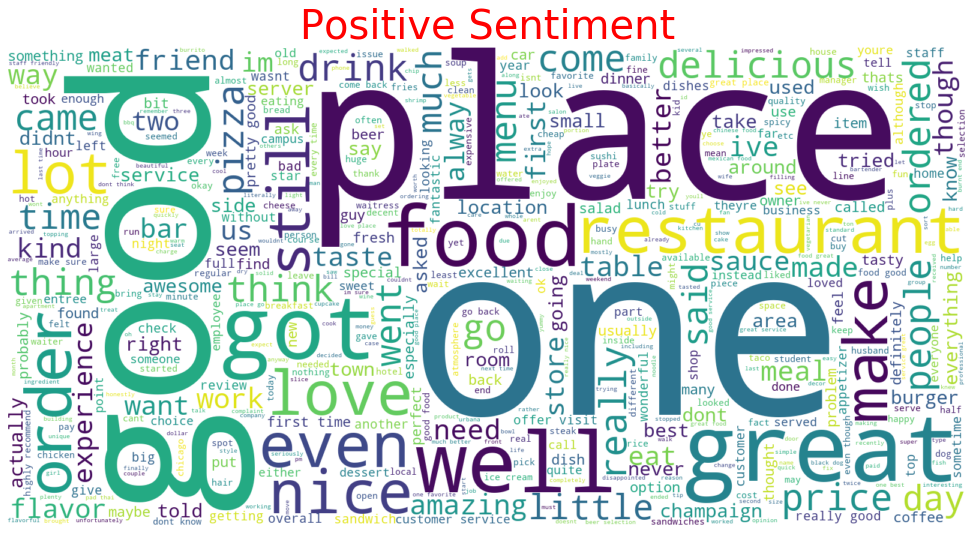

In [15]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review_posr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

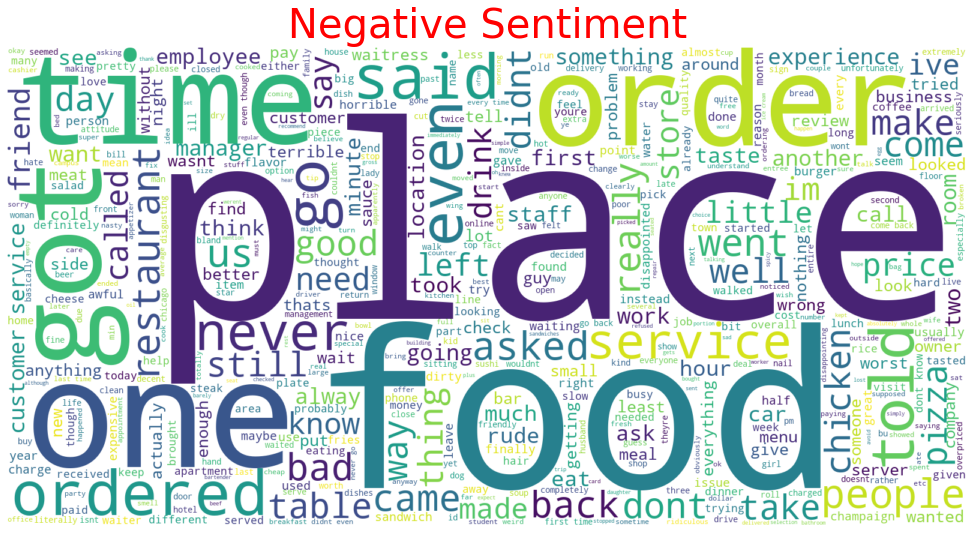

In [16]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review_negr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

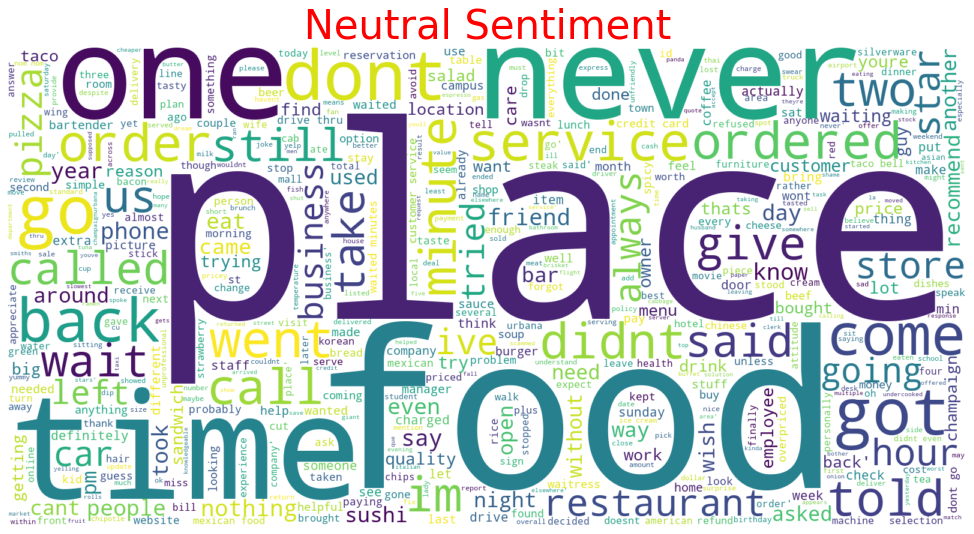

In [17]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review_neutr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Neutral Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [18]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,latitude,longitude,review_count,is_open,attributes,categories,hours,text_processed,text_sentiment,sentiment
0,XsBgj268rbYJ5ljKj02JxA,THirRdo5CwitTPyqV28NyQ,E9HN0nA8eRsIBZYkL0H3xA,4.0,0,0,0,I got stuck in Myrtle Beach last week and stay...,2012-11-06 02:46:40,Courtyard by Marriott Champaign,...,40.136355,-88.251516,21,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels & Travel, Event Planning & Services, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",got stuck myrtle beach last week stayed waitin...,0.192063,positive
1,Ib6SFU9TD552DQY7SxwRaQ,MkIDdcerLigepann4ZPfdg,E9HN0nA8eRsIBZYkL0H3xA,1.0,4,3,3,"Unfortunately, I have to agree with the other ...",2012-08-17 22:29:16,Courtyard by Marriott Champaign,...,40.136355,-88.251516,21,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels & Travel, Event Planning & Services, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",unfortunately agree negative review thats post...,0.040323,positive
2,qcTPJy_vcQVUu0mmmbxTTw,o6NcaAHsodkb5PU_kQQCvQ,E9HN0nA8eRsIBZYkL0H3xA,5.0,0,0,0,Can't go wrong with 24 hour Starbuck's service...,2013-10-04 07:05:30,Courtyard by Marriott Champaign,...,40.136355,-88.251516,21,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels & Travel, Event Planning & Services, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",cant go wrong hour starbucks service stayed mi...,0.164815,positive
3,RBHv9CAneUguOLWvjnsD8A,TTH9WPSgliutOj9KUha3Bw,E9HN0nA8eRsIBZYkL0H3xA,2.0,1,0,0,I expected much more than what I received here...,2017-05-01 18:29:08,Courtyard by Marriott Champaign,...,40.136355,-88.251516,21,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels & Travel, Event Planning & Services, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",expected much received first free internet pra...,0.103872,positive
4,JtkgfLYk2bUP52wMWiugrQ,WJR8f_QNG1kuPq5V6RxeFA,E9HN0nA8eRsIBZYkL0H3xA,3.0,5,2,5,This Courtyard is pretty on par with the other...,2015-10-26 13:33:10,Courtyard by Marriott Champaign,...,40.136355,-88.251516,21,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels & Travel, Event Planning & Services, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",courtyard pretty par newly decorated courtyard...,0.088537,positive


In [19]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(review.shape)
# COLUMN NAMES
print("Column names:")
print(review.columns)
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(review.dtypes)
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(review.head())
# DATASET SUMMARY
review.describe(include='all')

Shape of the dataset:
(42371, 24)
Column names:
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'text_processed', 'text_sentiment',
       'sentiment'],
      dtype='object')
Datatype of each column:
review_id          object
user_id            object
business_id        object
stars             float64
useful              int64
funny               int64
cool                int64
text               object
date               object
name               object
address            object
city               object
state              object
postal_code        object
latitude          float64
longitude         float64
review_count        int64
is_open             int64
attributes         object
categories         object
hours              object
text_processed     object
text_sentiment   

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,latitude,longitude,review_count,is_open,attributes,categories,hours,text_processed,text_sentiment,sentiment
count,42371,42371,42371,42371.000000,42371.000000,42371.000000,42371.000000,42371,42371,42371,...,42371.000000,42371.000000,42371.000000,42371.000000,40599,42348,37070,42371,42371.000000,42371
unique,42371,14659,1932,NaN,NaN,NaN,NaN,42306,42320,1728,...,NaN,NaN,NaN,NaN,1051,1504,954,42286,NaN,3
top,t7WZITL2QACpcPz6VXmIWg,qntQp9UoeP6ju8D_W0Y0cw,9MnbQg7kfb_WgxoV0hXKSQ,NaN,NaN,NaN,NaN,"If I die young, bury me in queso.\n\nQueso fro...",2014-06-27 03:33:44,Black Dog Smoke & Ale House,...,NaN,NaN,NaN,NaN,{'BusinessAcceptsCreditCards': 'True'},"Mexican, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",,NaN,positive
freq,1,215,822,NaN,NaN,NaN,NaN,2,4,1102,...,NaN,NaN,NaN,NaN,1297,974,1451,12,NaN,35697
mean,NaN,NaN,NaN,3.582804,1.394067,0.405112,0.336409,NaN,NaN,NaN,...,40.106372,-88.272415,110.266739,0.846050,NaN,NaN,NaN,NaN,0.216109,NaN
std,NaN,NaN,NaN,1.475696,4.946094,1.802702,0.971664,NaN,NaN,NaN,...,0.235679,0.863709,155.414679,0.360905,NaN,NaN,NaN,NaN,0.233073,NaN
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,33.449413,-112.208011,3.000000,0.000000,NaN,NaN,NaN,NaN,-1.000000,NaN
25%,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,40.109222,-88.247552,19.000000,1.000000,NaN,NaN,NaN,NaN,0.081956,NaN
50%,NaN,NaN,NaN,4.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,...,40.112708,-88.242677,50.000000,1.000000,NaN,NaN,NaN,NaN,0.221012,NaN
75%,NaN,NaN,NaN,5.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,...,40.118337,-88.229538,125.000000,1.000000,NaN,NaN,NaN,NaN,0.358929,NaN


In [20]:
review['length'] = review['text'].apply(len)

In [21]:
stval = review.groupby('stars').mean()
stval

,useful,funny,cool,latitude,longitude,review_count,is_open,text_sentiment,length
stars,,,,,,,,,
1.0,2.786239,0.681564,0.236254,40.077449,-88.394974,59.112320,0.849309,-0.047648,741.947956
2.0,1.718132,0.606862,0.232785,40.114056,-88.247508,95.418394,0.808196,0.077729,736.900167
3.0,1.065437,0.428191,0.290660,40.113471,-88.247053,110.972037,0.805973,0.178682,641.673768
4.0,0.975552,0.345557,0.382537,40.113446,-88.239987,128.525732,0.818593,0.275479,559.832563
5.0,1.087118,0.266606,0.391819,40.109932,-88.255314,124.235714,0.883578,0.337821,485.793346


In [22]:
stval.corr()

,useful,funny,cool,latitude,longitude,review_count,is_open,text_sentiment,length
useful,1.000000,0.880888,-0.743272,-0.901912,-0.923335,-0.978056,0.138226,-0.908106,0.757658
funny,0.880888,1.000000,-0.950651,-0.630276,-0.674551,-0.925578,-0.316143,-0.987976,0.974837
cool,-0.743272,-0.950651,1.000000,0.449781,0.505782,0.841771,0.425343,0.933564,-0.978015
latitude,-0.901912,-0.630276,0.449781,1.000000,0.997913,0.857553,-0.369564,0.712699,-0.470859
longitude,-0.923335,-0.674551,0.505782,0.997913,1.000000,0.888374,-0.331269,0.753499,-0.522483
review_count,-0.978056,-0.925578,0.841771,0.857553,0.888374,1.000000,-0.010050,0.959231,-0.838535
is_open,0.138226,-0.316143,0.425343,-0.369564,-0.331269,-0.010050,1.000000,0.268419,-0.503157
text_sentiment,-0.908106,-0.987976,0.933564,0.712699,0.753499,0.959231,0.268419,1.000000,-0.954193
length,0.757658,0.974837,-0.978015,-0.470859,-0.522483,-0.838535,-0.503157,-0.954193,1.000000


#### Thus, we can see that there is negative correlation between:
* Cool and Useful
* Cool and Funny
* Cool and Length
#### Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
#### Whereas, there is a positive correlation between:
* Funny and Useful    
* Funny and Length
* Useful and Length 
#### Thus, we can say that longer reviews tend to be funny and useful.

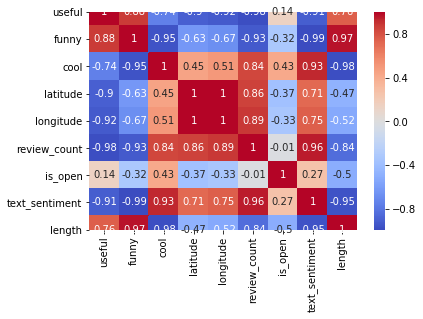

In [23]:
sns.heatmap(stval.corr(), cmap='coolwarm',annot=True)